# 비계층적 군집

# Kmeans
* 1. 중심 포인트(CP1 랜덤)로부터 k(임의지정)개를 그룹화
* 2. 그 그룹화된 반경 내에서 각 포인트(k-1) 간의 거리(유클리드)
* 3. 평균 거리값이 가장 작은 포인트가 중심(CP2)으로 재설정
* 4. 중심(CP1)은 일반 포인트가 되서 가장 가까운 CP를 찾고 반경 내로 재그룹이 형성
* 5. 무한 반복... 포인트의 변경이 없을 때까지

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot  as plt
import seaborn as sns
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()

cols=['Sepal length','Sepal width','Petal length','Petal width']
df = pd.DataFrame(iris.data, columns = cols)
df['target'] = iris.target


In [2]:
def myscore(model , X, ncluster):
    c_coef = silhouette_samples(X, ncluster)
    score = silhouette_score(X, ncluster)# df['c_coef'].mean()와 동일
    # 응집도
    intertia = model.inertia_
    print(f"실루옛 계수 {score:.4f}, 응집도 {intertia:.4f}")
    return c_coef, score, intertia

In [3]:
df_2col = df[ ['Sepal length','Sepal width']]

model = KMeans(n_clusters=3)
model.fit(df_2col)
ncluster = model.predict(df_2col)
df['ncluster'] = ncluster

print(df)


     Sepal length  Sepal width  Petal length  Petal width  target  ncluster
0             5.1          3.5           1.4          0.2       0         0
1             4.9          3.0           1.4          0.2       0         0
2             4.7          3.2           1.3          0.2       0         0
3             4.6          3.1           1.5          0.2       0         0
4             5.0          3.6           1.4          0.2       0         0
..            ...          ...           ...          ...     ...       ...
145           6.7          3.0           5.2          2.3       2         1
146           6.3          2.5           5.0          1.9       2         2
147           6.5          3.0           5.2          2.0       2         1
148           6.2          3.4           5.4          2.3       2         1
149           5.9          3.0           5.1          1.8       2         2

[150 rows x 6 columns]


In [4]:
model.cluster_centers_

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

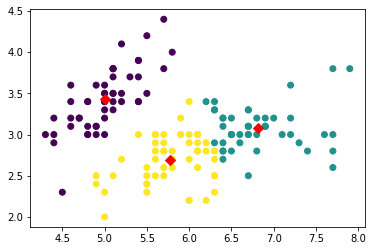

In [5]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length','Sepal width'])
center_x = centers['Sepal length']
center_y = centers['Sepal width']

# scatter plot
plt.scatter(df['Sepal length'],df['Sepal width'],c=df['ncluster'])
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [6]:
myscore(model ,df[ ['Sepal length','Sepal width']], df['ncluster'])

실루옛 계수 0.4451, 응집도 37.0507


(array([0.59821502, 0.40612542, 0.56116222, 0.50873385, 0.62315302,
        0.45565352, 0.5864484 , 0.60869183, 0.39425208, 0.48741484,
        0.45148528, 0.61919956, 0.44125142, 0.42414742, 0.23521458,
        0.29133554, 0.45565352, 0.59821502, 0.25359469, 0.57981119,
        0.33465369, 0.59433196, 0.58646285, 0.52470289, 0.61919956,
        0.34535262, 0.60869183, 0.54753336, 0.51296915, 0.56116222,
        0.50989532, 0.33465369, 0.4870954 , 0.37999471, 0.48741484,
        0.51365274, 0.29548011, 0.62716096, 0.43998322, 0.57293064,
        0.62529499, 0.05305997, 0.50523725, 0.62529499, 0.57981119,
        0.44125142, 0.57981119, 0.54777875, 0.5128406 , 0.57052151,
        0.61662244, 0.35479484, 0.62536195, 0.51897012, 0.2972364 ,
        0.59856472, 0.23926834, 0.10278049, 0.46667301, 0.19579235,
        0.2528595 , 0.48310025, 0.45291149, 0.34331071, 0.47853986,
        0.58878984, 0.39231911, 0.63790498, 0.32691737, 0.59001846,
        0.33949542, 0.39510251, 0.2127447 , 0.39

In [7]:
df.head()

,Sepal length,Sepal width,Petal length,Petal width,target,ncluster
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler_val = scaler.fit_transform(df[ ['Sepal length','Sepal width']])
df_scaler =  pd.DataFrame(scaler_val, columns = ['Sepal length_scale','Sepal width_scale'])

In [12]:
model = KMeans(n_clusters=3)
model.fit(scaler_val)
ncluster = model.predict(scaler_val)
df['ncluster_scaler'] = ncluster

df.head()


,Sepal length,Sepal width,Petal length,Petal width,target,ncluster,ncluster_scaler
0,5.1,3.5,1.4,0.2,0,0,1
1,4.9,3.0,1.4,0.2,0,0,1
2,4.7,3.2,1.3,0.2,0,0,1
3,4.6,3.1,1.5,0.2,0,0,1
4,5.0,3.6,1.4,0.2,0,0,1


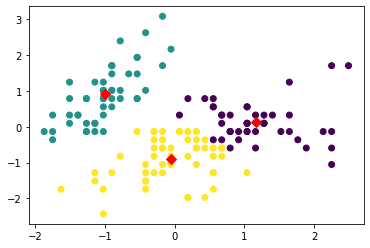

In [15]:
centers = pd.DataFrame(model.cluster_centers_,columns=['Sepal length_scale','Sepal width_scale'])
center_x = centers['Sepal length_scale']
center_y = centers['Sepal width_scale']

# scatter plot
plt.scatter(df_scaler['Sepal length_scale'],df_scaler['Sepal width_scale'],c=df['ncluster_scaler'])
plt.scatter(center_x,center_y,s=50,marker='D',c='r')
plt.show()

In [16]:
myscore(model, df_scaler, df['ncluster_scaler'])

실루옛 계수 0.4384, 응집도 102.6154


(array([ 0.64184729,  0.20778099,  0.51020306,  0.41439978,  0.65129743,
         0.48586506,  0.60178921,  0.62539392,  0.18795933,  0.37179146,
         0.53319274,  0.62713432,  0.24980306,  0.30598426,  0.30421612,
         0.27126206,  0.48586506,  0.64184729,  0.36897539,  0.59214974,
         0.50241744,  0.6227129 ,  0.61823858,  0.53861143,  0.62713432,
         0.14949327,  0.62539392,  0.62010407,  0.5817713 ,  0.51020306,
         0.39683847,  0.50241744,  0.46024334,  0.36620754,  0.37179146,
         0.4657105 ,  0.47465223,  0.65069103,  0.30709362,  0.60895632,
         0.65210128,  0.31116475,  0.47954002,  0.65210128,  0.59214974,
         0.24980306,  0.59214974,  0.50508709,  0.57208358,  0.56297959,
         0.60479002,  0.46373081,  0.60270726,  0.5474162 ,  0.03731302,
         0.54421895,  0.42269886,  0.42980345,  0.32465577,  0.44079286,
         0.43108421,  0.24138132,  0.46214511,  0.23820326,  0.46355263,
         0.57441544,  0.31190338,  0.58027722,  0.4

## 최적의 군집개수는 몇 개?

6 ------------------------------
실루옛 계수 0.4442, 응집도 166.9517


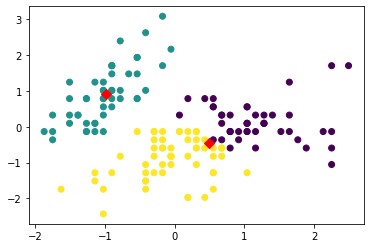

6 ------------------------------
실루옛 계수 0.4348, 응집도 102.6339


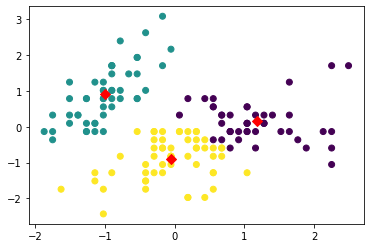

6 ------------------------------
실루옛 계수 0.3891, 응집도 79.7611


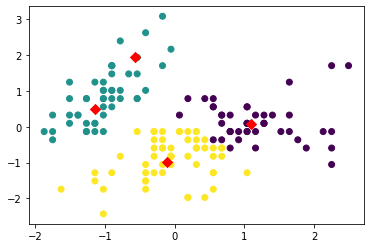

6 ------------------------------
실루옛 계수 0.3614, 응집도 61.8092


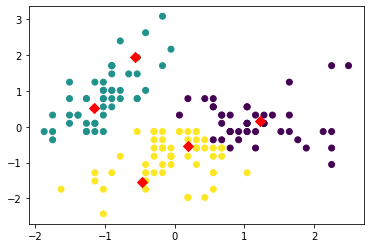

6 ------------------------------
실루옛 계수 0.3490, 응집도 52.2356


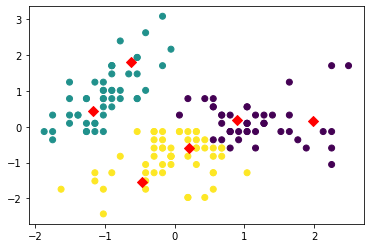

In [37]:
NS = [2,3,4,5,6]

center = []
for i in range(len(NS)):
    model = KMeans(n_clusters=NS[i])
    model.fit(scaler_val)
    ncluster = model.predict(scaler_val)
    # df['ncluster'] = ncluster
    print(n, "--"* 15)
    myscore(model, df_2col, ncluster)
    
    center.append(model.cluster_centers_)
    center_x = center[i][:,0]
    center_y = center[i][:,1]
    # scatter plot
    plt.scatter(df_scaler['Sepal length_scale'],df_scaler['Sepal width_scale'],c=df['ncluster_scaler'])
    plt.scatter(center_x,center_y,s=50,marker='D',c='r')
    plt.show()



In [ ]:
검증

In [38]:
ctab = pd.crosstab(df['target'], df['ncluster_scaler'])
print(ctab)

ncluster_scaler   0   1   2
target                     
0                 0  49   1
1                14   0  36
2                31   0  19


# 계층적 군집

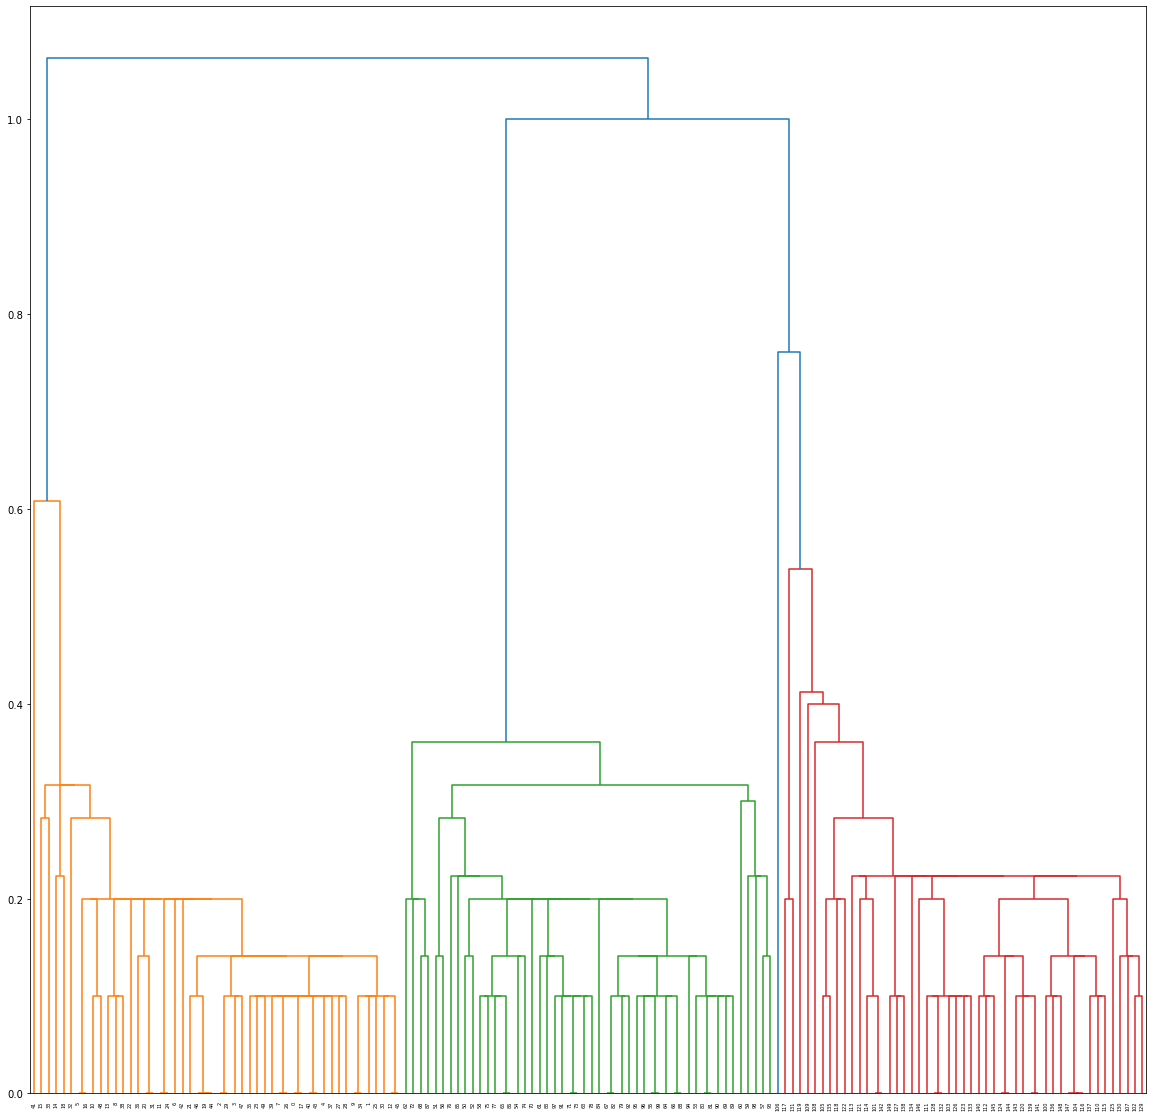

In [45]:
from scipy.cluster.hierarchy import linkage, dendrogram
plt.figure(figsize=(20,20))

matrix = linkage(pd.concat([df_2col, df["target"]], axis= 1), method= 'single', metric= 'euclidean')
dendrogram(matrix)
plt.show()

